In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#### Loading the data and setting the date columns as an index column

In [ ]:
# Load dataset from GitHub
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
# Check the shape of the dataset
df_shape = df.shape

(92016, 5)

In [ ]:
# Display data types of columns
df_types = df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [ ]:
# Summarize missing values per column
missing_sum = df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [ ]:
# Check for missing values
any_missing = df.isnull().values.any()


False

In [ ]:
# Convert 'FullDate' column to datetime format
from datetime import datetime
df['FullDate'] = pd.to_datetime(df['FullDate'])

# Rename columns for clarity
df = df.rename(columns={"FullDate": "Date", "ElecPrice": "Price"})
df.set_index('Date', inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
# Generate descriptive statistics
df_stats = df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [ ]:
# Resample data from hourly to daily frequency
df_daily = df.resample('D').sum()

In [ ]:
# Calculate correlation matrix for daily data
daily_corr = df_daily.corr()


,Tmax,SysLoad,GasPrice,y
Tmax,1.000000,-0.012249,0.030173,0.004748
SysLoad,-0.012249,1.000000,-0.268321,0.170524
GasPrice,0.030173,-0.268321,1.000000,0.352420
y,0.004748,0.170524,0.352420,1.000000


In [ ]:
# Display shape of daily data
daily_shape = df_daily.shape

(3834, 4)

**Plot of the daily ElecPrice over time**

Text(0, 0.5, 'ElecPrice')

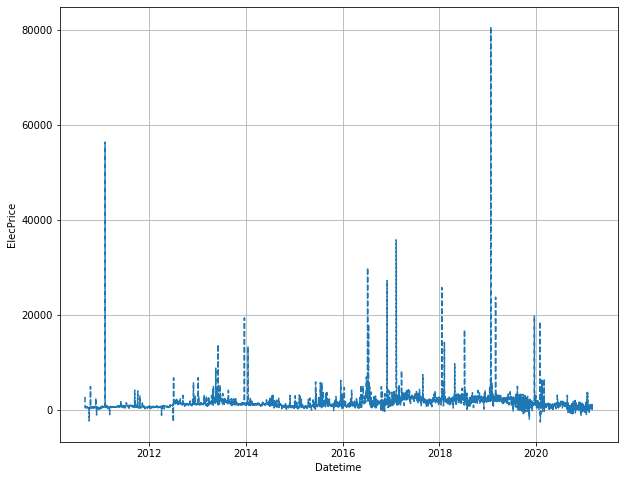

In [ ]:
# Plot daily electricity price over time
plt.figure(figsize=(10, 8))
plt.plot(df_daily.index, df_daily.Price, '--')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Electricity Price')

In [ ]:
# Import necessary libraries for statistical tests
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test on relevant variables
adf_sysload = adfuller(df_daily['SysLoad'])
adf_gasprice = adfuller(df_daily['GasPrice'])
print(f'ADF p-value for SysLoad: {round(adf_sysload[1], 6)}')
print(f'ADF p-value for GasPrice: {round(adf_gasprice[1], 6)}')

p-value of the SysLoad: 0.004254
p-value of the GasPrice: 0.045027


In [ ]:
# Display critical values for GasPrice
adf_gasprice = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic: {round(adf_gasprice[0], 4)}')
print('Critical Values:')
for k, v in adf_gasprice[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -2.9028
Critical Values:
   1%: -3.4320693157877544
   5%: -2.8622996992165364
   10%: -2.5671743978048323


In [ ]:
# Display critical values for Electricity Price
adf_elecprice = adfuller(df_daily['Price'])
print(f'ADF Statistic: {round(adf_elecprice[0], 4)}')
print('Critical Values:')
for k, v in adf_elecprice[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -8.2691
Critical Values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


**Splitting the Dataset into train and test sets**

In [ ]:
# Reset index for further analysis
df_daily.reset_index(inplace=True)

In [ ]:
# Split dataset into training and test sets
train = df_daily.iloc[:2757, :]
test = df_daily.iloc[2757:, :]

In [ ]:
# Display shape of training set
train_shape = train.shape

(2757, 5)

In [ ]:
# Display first few rows of training set
train_head = train.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
# Display shape of test set
test_shape = test.shape

(1077, 5)

In [ ]:
# Display first few rows of test set
test_head = test.head()

,ds,Tmax,SysLoad,GasPrice,y
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76
2761,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [ ]:
# Define function to calculate Mean Absolute Percentage Error (MAPE)
def mape(y, yhat):
    y = y.reset_index(drop=True)
    return round(np.mean(np.abs((y - yhat) / y) * 100), 2)

In [ ]:
# Import Prophet from Facebook's Prophet library
from fbprophet import Prophet

# Initialize Prophet model and fit it to training data
model_1 = Prophet()
model_1.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Make predictions on test data
pred1 = model_1.predict(test)

# Calculate MAPE for Prophet model
mape_result = mape(test['Price'], pred1['yhat'])

549.48

In [ ]:
# Define function to calculate Root Mean Squared Error (RMSE)
def rmse(y, yhat):
    y = y.reset_index(drop=True)
    return round(np.sqrt(np.mean(np.square(y - yhat))), 2)

In [ ]:
# Calculate RMSE for Prophet model
rmse_result = rmse(test['Price'], pred1['yhat'])

3218.16

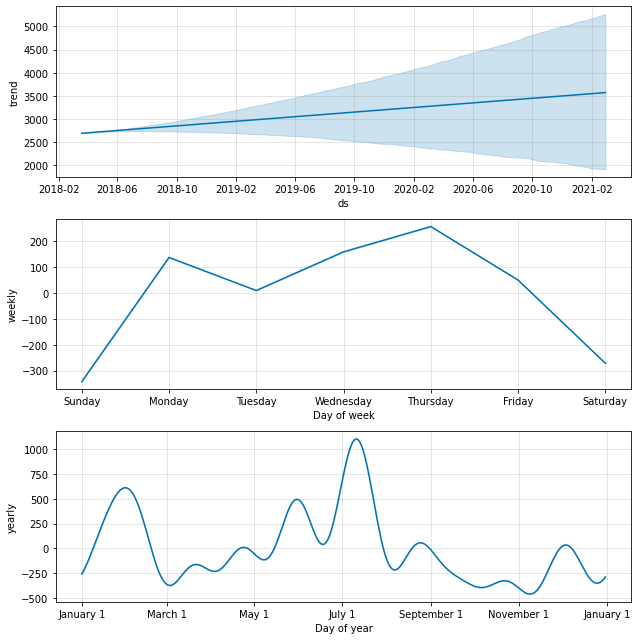

In [ ]:
# Plot components of the Prophet model
model_1.plot_components(pred1)
plt.show()

In [ ]:
# Rename columns 'SysLoad', 'Tmax', and 'GasPrice' to 'add1', 'add2', and 'add3'
new_df = df_daily.rename(columns={"SysLoad": "add1", "Tmax": "add2", "GasPrice": "add3"})
new_df.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
# Assign training and test data for multivariate model
train2 = new_df[:2757]
test2 = new_df[2757:]
print('Training set shape:', train2.shape)
print('Test set shape:', test2.shape)

train shape (2757, 5)
test shape (1077, 5)


In [ ]:
# Initialize Prophet model with additional regressors
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [ ]:
# Fit the model to training data
model2.fit(train2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Make predictions on test data
pred2 = model2.predict(test2)

# Calculate MAPE for Prophet model with additional regressors
mape_result2 = mape(test2['Price'], pred2['yhat'])

231.28

In [ ]:
# Calculate RMSE for Prophet model with additional regressors
rmse_result2 = rmse(test2['Price'], pred2['yhat'])

2706.92

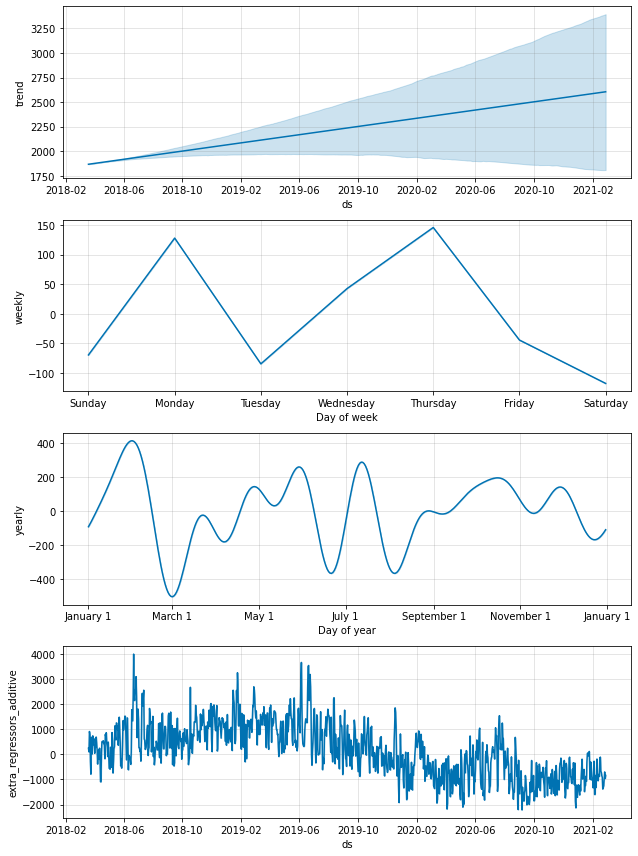

In [ ]:
# Plot components of the multivariate Prophet model
model2.plot_components(pred2)
plt.show()

In [ ]:
# Split the dataset into training and test sets
train3 = new_df.iloc[:2757, :]
test3 = new_df.iloc[2757:, :]

((2757, 5), (1077, 5))

In [ ]:
# Initialize Prophet model without 'Tmax' as a regressor
model_3 = Prophet()
model_3.add_regressor('add1')
model_3.add_regressor('add3')

In [ ]:
# Fit the model to training data
model_3.fit(train3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Make predictions on test data
pred3 = model_3.predict(test3)

# Calculate MAPE for Prophet model without 'Tmax'
mape_result3 = mape(test3['Price'], pred3['yhat'])

233.72

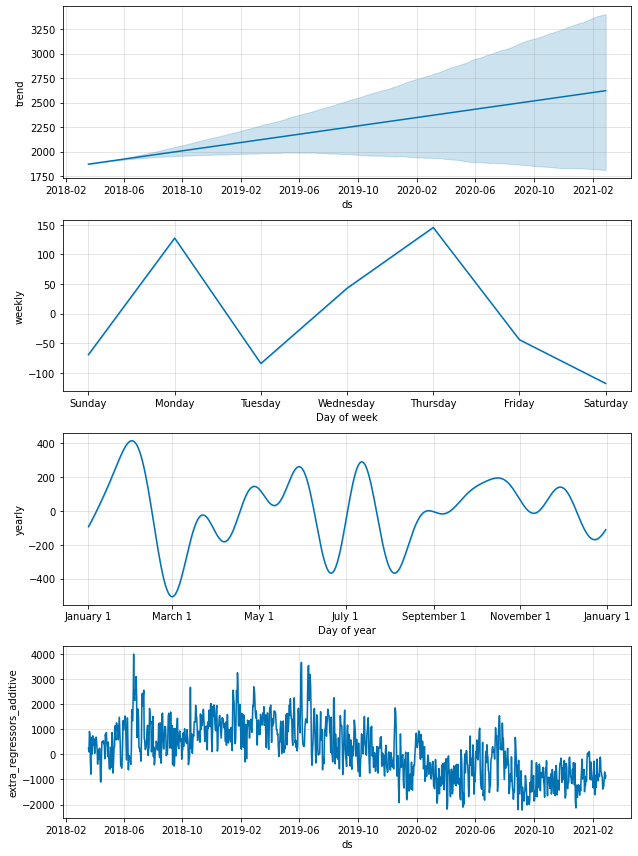

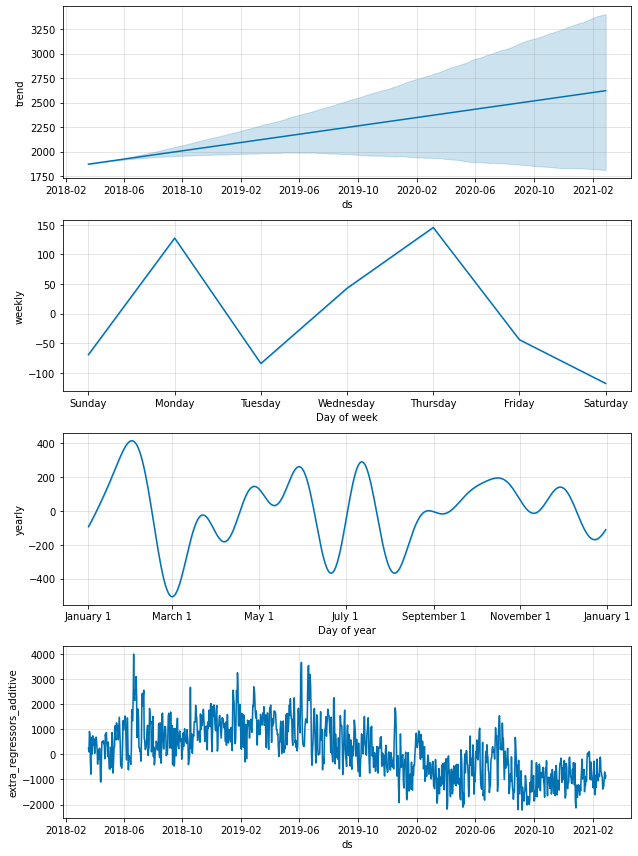

In [ ]:
# Plot components of the Prophet model without 'Tmax'
model_3.plot_components(pred3)

# Display the final results and visualizations